# CAPSTONE PROJECT: THE BATTEL OF NEIGHTBORHOOD

In [3]:
import sys
#!{sys.executable} -m pip install geopy
#!{sys.executable} -m pip install folium
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import folium
import requests

import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [4]:
with open('ny_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data['features']

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

In [6]:
# create new dataframe
columns = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
ny_df = pd.DataFrame(columns=columns)
ny_df

,Borough,Neighborhood,Latitude,Longitude


In [9]:
# assign the data to the dataframe
for data in newyork_data['features']:
    ny_df = ny_df.append(
        {'Borough': data['properties']['borough'],
        'Neighborhood': data['properties']['name'],
        'Latitude': data['geometry']['coordinates'][1],
        'Longitude': data['geometry']['coordinates'][0],
    }, ignore_index=True)
ny_df

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


# Create Map for Ny City Showing Different Neightborhood

In [10]:
# get the latitude and longitude of new york city
ny_adress = "New York City, NY"
geolocation = Nominatim(user_agent='ny_explorer')
location = geolocation.geocode(ny_adress)
ny_latitude = location.latitude
ny_longitude = location.longitude
print(ny_latitude,ny_longitude)

40.7127281 -74.0060152


# Create visulaize Map for the New York Neighborhoods

In [11]:
ny_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=10)
X = ny_df['Latitude']
Y = ny_df['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
ny_df['Cluster'] = clusters

for borough, neighborhood, lat, lng, cluster in zip(ny_df['Borough'],ny_df['Neighborhood'], ny_df['Latitude'], ny_df['Longitude'], ny_df['Cluster']):
    label = "{}, {}".format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.5,
        parse_html=False
    ).add_to(ny_map)

ny_map

In [12]:
ny_df['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

# COMPARE 2 BOROUGH QUEENS AND MHNATAN

# data for Queens

In [13]:
ny_df.drop('Cluster', inplace=True, axis=1)
queen_df = ny_df[ny_df['Borough'] == 'Queens']
queen_df.reset_index(drop=True, inplace=True)
queen_df.reset_index(drop=True, inplace=True)
queen_df

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138
...,...,...,...,...
76,Queens,Middle Village,40.716415,-73.881143
77,Queens,Malba,40.790602,-73.826678
78,Queens,Hammels,40.587338,-73.805530
79,Queens,Bayswater,40.611322,-73.765968


Get the location coordinates of Queen

In [14]:
queen_adress = "Queens, NY"
geolocation = Nominatim(user_agent='queens_explorer')
location = geolocation.geocode(queen_adress)
queens_latitude = location.latitude
queens_longitude = location.longitude
print(queens_latitude, queens_longitude)

40.7498243 -73.7976337


# define foursqure api credentials

In [15]:
CLIENT_ID = 'SKGXK2M4PA4C1NCEUUE02RQF3GTX1W1GKLU55QBSXI4ECSST' # your Foursquare ID
CLIENT_SECRET = 'NJHQAFOPJ1STARIM00HWPCPA05M4IFBQ5P4ES4HELQRR2SIB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SKGXK2M4PA4C1NCEUUE02RQF3GTX1W1GKLU55QBSXI4ECSST
CLIENT_SECRET:NJHQAFOPJ1STARIM00HWPCPA05M4IFBQ5P4ES4HELQRR2SIB


In [16]:
# define function to get the all nearby venues  
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
queen_venues = getNearbyVenues(names=queen_df['Neighborhood'], latitudes=queen_df['Latitude'], longitudes=queen_df['Longitude'], radius=500, LIMIT=100)
queen_venues

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
4,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
...,...,...,...,...,...,...,...
2078,Queensbridge,40.756091,-73.945631,Queensbridge Basketball Courts,40.755060,-73.949103,Basketball Court
2079,Queensbridge,40.756091,-73.945631,The Ravel Hotel Gym,40.753787,-73.948815,Athletics & Sports
2080,Queensbridge,40.756091,-73.945631,Profundo Pool Club,40.753719,-73.948878,Hotel Pool
2081,Queensbridge,40.756091,-73.945631,Estate Garden And Grill,40.753700,-73.948841,Beer Garden


In [19]:
print(queen_venues.head())

  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Astoria              40.768509              -73.915654   
1      Astoria              40.768509              -73.915654   
2      Astoria              40.768509              -73.915654   
3      Astoria              40.768509              -73.915654   
4      Astoria              40.768509              -73.915654   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
0        Favela Grill       40.767348       -73.917897  Brazilian Restaurant  
1      Orange Blossom       40.769856       -73.917012          Gourmet Shop  
2    Titan Foods Inc.       40.769198       -73.919253          Gourmet Shop  
3  Simply Fit Astoria       40.769114       -73.912403                   Gym  
4     CrossFit Queens       40.769404       -73.918977                   Gym  


In [20]:
queen_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,20,20,20,20,20,20
Astoria,99,99,99,99,99,99
Astoria Heights,13,13,13,13,13,13
Auburndale,22,22,22,22,22,22
Bay Terrace,37,37,37,37,37,37
...,...,...,...,...,...,...
Sunnyside Gardens,100,100,100,100,100,100
Utopia,15,15,15,15,15,15
Whitestone,5,5,5,5,5,5


In [63]:
print(len(queen_venues['Venue Category'].unique()))

267


# analyse each neighbirhood of queens

In [21]:
#queen_venues.head()


# one hot encoding
queen_venues_onehot = pd.get_dummies(queen_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
queen_venues_onehot['Neighborhood'] = queen_venues['Neighborhood'] 

# move neighborhood column to the first column
#fixed_columns = [queen_venues_onehot.columns[-1]] + list(queen_venues_onehot.columns[:-1])
#queen_venues_onehot = queen_venues_onehot[fixed_columns]
queen_venues_onehot.head()

,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
queen_venues_grouped = queen_venues_onehot.groupby('Neighborhood').mean().reset_index()
print(queen_venues_grouped.head())

      Neighborhood  Accessories Store  Afghan Restaurant  American Restaurant  \
0          Arverne           0.000000                0.0             0.000000   
1          Astoria           0.000000                0.0             0.010101   
2  Astoria Heights           0.000000                0.0             0.000000   
3       Auburndale           0.000000                0.0             0.045455   
4      Bay Terrace           0.027027                0.0             0.054054   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0          0.0         0.0   
1               0.0                     0.0          0.0         0.0   
2               0.0                     0.0          0.0         0.0   
3               0.0                     0.0          0.0         0.0   
4               0.0                     0.0          0.0         0.0   

   Arts & Crafts Store  Arts & Entertainment  ...  Video Game Store  \
0        

In [23]:
num_top_venues = 10

for hood in queen_venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = queen_venues_grouped[queen_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
            venue  freq
0       Surf Spot  0.20
1  Sandwich Place  0.10
2   Metro Station  0.10
3      Restaurant  0.05
4           Beach  0.05
5      Playground  0.05
6     Pizza Place  0.05
7     Coffee Shop  0.05
8            Café  0.05
9        Bus Stop  0.05


----Astoria----
                       venue  freq
0  Middle Eastern Restaurant  0.06
1                        Bar  0.06
2                 Hookah Bar  0.04
3          Indian Restaurant  0.04
4           Greek Restaurant  0.04
5                     Bakery  0.04
6         Seafood Restaurant  0.04
7   Mediterranean Restaurant  0.03
8                       Café  0.03
9               Gourmet Shop  0.02


----Astoria Heights----
                venue  freq
0  Italian Restaurant  0.15
1         Bus Station  0.08
2              Hostel  0.08
3        Burger Joint  0.08
4       Bowling Alley  0.08
5          Laundromat  0.08
6         Supermarket  0.08
7         Pizza Place  0.08
8               Motel  0.08
9          

9          Outdoors & Recreation  0.00


----Flushing----
                  venue  freq
0     Hotpot Restaurant  0.10
1       Bubble Tea Shop  0.07
2                Bakery  0.05
3    Chinese Restaurant  0.05
4     Korean Restaurant  0.05
5           Karaoke Bar  0.05
6  Gym / Fitness Center  0.03
7                   Gym  0.03
8             BBQ Joint  0.03
9        Cosmetics Shop  0.03


----Forest Hills----
                  venue  freq
0                   Gym  0.08
1  Gym / Fitness Center  0.08
2           Yoga Studio  0.05
3      Asian Restaurant  0.05
4                  Park  0.05
5              Pharmacy  0.05
6       Thai Restaurant  0.05
7     Convenience Store  0.05
8           Pizza Place  0.05
9          Liquor Store  0.05


----Forest Hills Gardens----
                venue  freq
0      Sandwich Place  0.09
1       Grocery Store  0.09
2              Bakery  0.09
3   Mobile Phone Shop  0.05
4  Mexican Restaurant  0.05
5                Food  0.05
6   Food & Drink Shop  0.05
7   

----Murray Hill----
                 venue  freq
0    Korean Restaurant  0.47
1          Supermarket  0.04
2                  Bar  0.04
3          Coffee Shop  0.04
4                 Bank  0.04
5               Bakery  0.02
6          Pet Service  0.02
7  Fried Chicken Joint  0.02
8       Cosmetics Shop  0.02
9         Dessert Shop  0.02


----Neponsit----
                           venue  freq
0                          Beach   1.0
1              Accessories Store   0.0
2           Other Great Outdoors   0.0
3          Performing Arts Venue   0.0
4                           Park   0.0
5  Paper / Office Supplies Store   0.0
6          Outdoors & Recreation   0.0
7                Other Nightlife   0.0
8                   Optical Shop   0.0
9                         Museum   0.0


----North Corona----
                       venue  freq
0              Deli / Bodega  0.19
1                     Bakery  0.14
2       Gym / Fitness Center  0.10
3                Pizza Place  0.10
4         Mexic

9               Gourmet Shop  0.03




In [24]:

## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd', 'th','th', 'th', 'th', 'th', 'th', 'th']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighborhood_venues_sorted = pd.DataFrame(columns=columns)
Neighborhood_venues_sorted['Neighborhood'] = queen_venues_grouped['Neighborhood']

for ind in np.arange(queen_venues_grouped.shape[0]):
    Neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queen_venues_grouped.iloc[ind, :], num_top_venues)

Neighborhood_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Metro Station,Sandwich Place,Donut Shop,Burrito Place,Coffee Shop,Board Shop,Restaurant,Thai Restaurant,Café
1,Astoria,Middle Eastern Restaurant,Bar,Bakery,Hookah Bar,Seafood Restaurant,Indian Restaurant,Greek Restaurant,Mediterranean Restaurant,Café,Bubble Tea Shop
2,Astoria Heights,Italian Restaurant,Bus Station,Bakery,Burger Joint,Motel,Plaza,Playground,Hostel,Pizza Place,Bowling Alley
3,Auburndale,Italian Restaurant,Supermarket,Pet Store,Gymnastics Gym,Bar,Mattress Store,Korean Restaurant,Toy / Game Store,Comic Shop,Fast Food Restaurant
4,Bay Terrace,Clothing Store,Donut Shop,Shoe Store,American Restaurant,Mobile Phone Shop,Kids Store,Women's Store,Cosmetics Shop,Accessories Store,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...,...
76,Sunnyside Gardens,Bar,Grocery Store,Pizza Place,Coffee Shop,Pharmacy,Turkish Restaurant,Supermarket,Korean Restaurant,American Restaurant,Bank
77,Utopia,Deli / Bodega,Indie Movie Theater,Donut Shop,South American Restaurant,Bus Stop,Bakery,History Museum,Automotive Shop,Pizza Place,Basketball Court
78,Whitestone,Dance Studio,Bubble Tea Shop,Dive Bar,Candy Store,Deli / Bodega,Ice Cream Shop,Hotpot Restaurant,Food Stand,Food Court,Food & Drink Shop
79,Woodhaven,Deli / Bodega,Pharmacy,Bank,Thai Restaurant,Restaurant,Bar,Nail Salon,Bagel Shop,Chinese Restaurant,Park


In [26]:
# set number of clusters
kclusters = 5

queen_grouped_clustering = queen_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queen_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [27]:
# inster cluster labels into sorted values
Neighborhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
queen_merged = queen_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
queen_merged = queen_merged.join(Neighborhood_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

queen_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,1,Middle Eastern Restaurant,Bar,Bakery,Hookah Bar,Seafood Restaurant,Indian Restaurant,Greek Restaurant,Mediterranean Restaurant,Café,Bubble Tea Shop
1,Queens,Woodside,40.746349,-73.901842,1,Grocery Store,Filipino Restaurant,Thai Restaurant,Bakery,Latin American Restaurant,Donut Shop,Pub,American Restaurant,Bar,Gourmet Shop
2,Queens,Jackson Heights,40.751981,-73.882821,1,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Mexican Restaurant,Thai Restaurant,Supermarket,Pizza Place,Supplement Shop
3,Queens,Elmhurst,40.744049,-73.881656,1,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,Snack Place,Salon / Barbershop,Bar,Bank,Colombian Restaurant,Malay Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,1,Pharmacy,Italian Restaurant,Sandwich Place,Clothing Store,Chinese Restaurant,Fast Food Restaurant,Spa,Sporting Goods Shop,Bank,Breakfast Spot


In [28]:
queen_map = folium.Map(location=[queens_latitude, queens_longitude], zoom_start=10)

rainbow = ['red','green','blue','yellow', 'pink']

for lat, lng, neighborhood, cluster in zip(queen_merged['Latitude'], queen_merged['Longitude'], queen_merged['Neighborhood'], queen_merged['Cluster Labels']):
    label = "{}, {}".format(neighborhood, cluster)
    label = folium.Popup(label, parse_index=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.5,
        parse_html=False
    ).add_to(queen_map)
queen_map

# Generate CLuster map for another Borough in Ny i.e Manhattan

In [29]:
# generate location co-ordinates for Manhattan
mnh_address = "Manhattan, NY"
mnh_geolocation = Nominatim(user_agent="mnh_explorer")
mnh_location = mnh_geolocation.geocode(mnh_address)
mnh_latitude = mnh_location.latitude
mnh_longitude = mnh_location.longitude
print(mnh_latitude)
print(mnh_longitude)

40.7896239
-73.9598939


In [30]:
mnh_df = ny_df[ny_df['Borough'] == 'Manhattan']
mnh_df.reset_index(drop=True, inplace=True)
mnh_df


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [31]:
mnh_venues = getNearbyVenues(names=mnh_df['Neighborhood'], latitudes=mnh_df['Latitude'], longitudes=mnh_df['Longitude'], radius=500, LIMIT=100)
mnh_venues

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.910660,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.910660,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.910660,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.910660,Starbucks,40.877531,-73.905582,Coffee Shop
...,...,...,...,...,...,...,...
3172,Hudson Yards,40.756658,-74.000111,EDEN Local,40.759909,-73.996301,Restaurant
3173,Hudson Yards,40.756658,-74.000111,George's,40.757760,-74.000963,Burger Joint
3174,Hudson Yards,40.756658,-74.000111,Jake's,40.757954,-74.002296,American Restaurant
3175,Hudson Yards,40.756658,-74.000111,NYPD Mounted Unit,40.759155,-74.004121,Stables


In [32]:
mnh_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,74,74,74,74,74,74
Carnegie Hill,89,89,89,89,89,89
Central Harlem,43,43,43,43,43,43
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


In [52]:
len(mnh_venues['Venue Category'].unique())

326

In [33]:

# one hot encoding for Manhattan
mnh_venues_onehot = pd.get_dummies(mnh_venues[['Venue Category']], prefix="",prefix_sep="")
mnh_venues_onehot['Neighborhood'] = mnh_venues['Neighborhood']
fixed_columns = [mnh_venues_onehot.columns[-1]] + list(mnh_venues_onehot.columns[:-1])
mnh_venues_onehot = mnh_venues_onehot[fixed_columns]
mnh_venues_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
mnh_venues_grouped = mnh_venues_onehot.groupby('Neighborhood').mean().reset_index()
print(mnh_venues_grouped.head())

        Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Battery Park City                0.0             0.0                0.0   
1      Carnegie Hill                0.0             0.0                0.0   
2     Central Harlem                0.0             0.0                0.0   
3            Chelsea                0.0             0.0                0.0   
4          Chinatown                0.0             0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  Arepa Restaurant  \
0            0.000000             0.013514           0.0               0.0   
1            0.000000             0.011236           0.0               0.0   
2            0.069767             0.046512           0.0               0.0   
3            0.000000             0.040000           0.0               0.0   
4            0.000000             0.030000           0.0               0.0   

   Argentinian Restaurant  Art Gallery  ...  Video Store  \
0 

In [35]:
## create the new dataframe and display the top 10 venues for each Locality.
num_mnh_top_venues = 10
indicators = ['st', 'nd', 'rd', 'th','th', 'th', 'th', 'th', 'th', 'th']


## create columns accordin to the number fo top venues
columns = ['Neighborhood']


# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_mnh_top_venues):
    columns.append("{}{} Most Common venue".format(ind+1, indicators[ind]))
print(columns)
# create a new dataframe

mnh_venues_sorted = pd.DataFrame(columns=columns)
mnh_venues_sorted['Neighborhood'] = mnh_venues_grouped['Neighborhood']

for ind in np.arange(mnh_venues_grouped.shape[0]):
    mnh_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mnh_venues_grouped.iloc[ind, :], num_mnh_top_venues)

mnh_venues_sorted

['Neighborhood', '1st Most Common venue', '2nd Most Common venue', '3rd Most Common venue', '4th Most Common venue', '5th Most Common venue', '6th Most Common venue', '7th Most Common venue', '8th Most Common venue', '9th Most Common venue', '10th Most Common venue']


,Neighborhood,1st Most Common venue,2nd Most Common venue,3rd Most Common venue,4th Most Common venue,5th Most Common venue,6th Most Common venue,7th Most Common venue,8th Most Common venue,9th Most Common venue,10th Most Common venue
0,Battery Park City,Park,Hotel,Gym,Coffee Shop,Memorial Site,Shopping Mall,Playground,BBQ Joint,Sandwich Place,Food Court
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Italian Restaurant,Wine Shop,French Restaurant,Cosmetics Shop,Bookstore,Gym,Gym / Fitness Center
2,Central Harlem,African Restaurant,French Restaurant,American Restaurant,Bar,Chinese Restaurant,Seafood Restaurant,Cosmetics Shop,Bookstore,Ethiopian Restaurant,Caribbean Restaurant
3,Chelsea,Coffee Shop,Bakery,American Restaurant,Art Gallery,Hotel,Italian Restaurant,Ice Cream Shop,Bookstore,Theater,Seafood Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Dessert Shop,Vietnamese Restaurant,Optical Shop,Salon / Barbershop,Noodle House,Spa,Hotpot Restaurant
5,Civic Center,Coffee Shop,Gym / Fitness Center,Cocktail Bar,Hotel,Yoga Studio,French Restaurant,Spa,Sushi Restaurant,Park,American Restaurant
6,Clinton,Theater,Gym,Gym / Fitness Center,American Restaurant,Italian Restaurant,Sandwich Place,Coffee Shop,Hotel,Cocktail Bar,Spa
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Latin American Restaurant,Sandwich Place,Deli / Bodega,Spa,Grocery Store,Liquor Store,Taco Place
8,East Village,Bar,Pizza Place,Mexican Restaurant,Cocktail Bar,Coffee Shop,Ice Cream Shop,Italian Restaurant,Korean Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
9,Financial District,Coffee Shop,Pizza Place,Cocktail Bar,American Restaurant,Bar,Café,Italian Restaurant,Gym / Fitness Center,Hotel,Steakhouse


In [36]:
# set number of clusters
kclusters = 5

mnh_grouped_clustering = mnh_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mnh_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 0, 0, 0, 0, 3, 1, 0])

In [37]:
# inster cluster labels into sorted values
mnh_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mnh_merged = mnh_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mnh_merged = mnh_merged.join(mnh_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mnh_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common venue,2nd Most Common venue,3rd Most Common venue,4th Most Common venue,5th Most Common venue,6th Most Common venue,7th Most Common venue,8th Most Common venue,9th Most Common venue,10th Most Common venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Coffee Shop,Discount Store,Sandwich Place,Gym,Yoga Studio,Tennis Stadium,Deli / Bodega,Department Store,Pizza Place,Diner
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Cocktail Bar,Dessert Shop,Vietnamese Restaurant,Optical Shop,Salon / Barbershop,Noodle House,Spa,Hotpot Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Spanish Restaurant,Bakery,Chinese Restaurant,Mobile Phone Shop,Grocery Store,Donut Shop,Deli / Bodega,Gym,New American Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Restaurant,Café,Deli / Bodega,Bakery,Park,Frozen Yogurt Shop,Pizza Place,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Yoga Studio,Bakery,Juice Bar,Latin American Restaurant,Park,Deli / Bodega


In [38]:
# clusetrimg map
mnh_map = folium.Map(location=[mnh_latitude,mnh_longitude], zoom_start=10)

rainbow_colors = ['red','green','blue','yellow', 'pink']
for lat, lng, neighborhood, cluster in zip(mnh_merged['Latitude'], mnh_merged['Longitude'], mnh_merged['Neighborhood'], mnh_merged['Cluster Labels']):
    label = "{}, {}".format(cluster, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        color=rainbow_colors[cluster],
        fill=True,
        fill_color=rainbow_colors[cluster],
        fill_opacity=0.7,
        parse_html=False
    ).add_to(mnh_map)
mnh_map

# Create Word Map for Both Queen and Manhattan to comapre which is Most Common venue

In [50]:
#!{sys.executable} -m pip install wordcloud
%matplotlib inline

from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as ptl
#queen_merged.head()

In [48]:
# create word string for queen_venues
queen_words = ""
for index in np.arange(queen_merged.shape[0]):
    queen_words = string + " ".join(list(queen_merged.iloc[index,5:]))

# create word cloud object
queen_wd = WordCloud(background_color='white')
queen_wd.generate(queen_words)
queen_wd

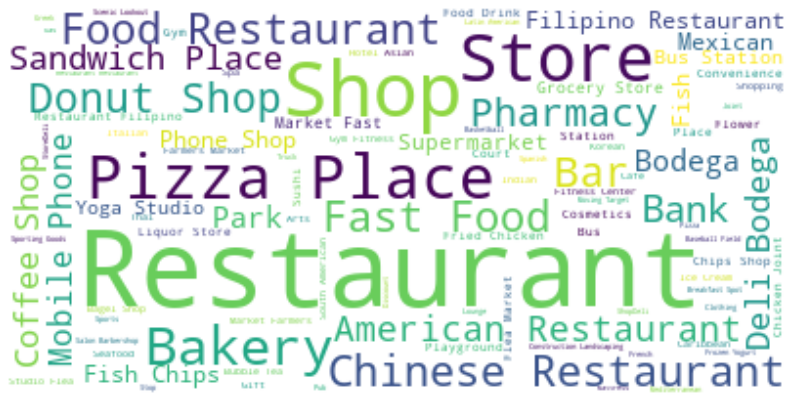

In [53]:
fig = ptl.figure()
fig.set_figwidth(14)
fig.set_figheight(14)
ptl.imshow(queen_wd, interpolation='bilinear')
ptl.axis('off')
ptl.show()

In [54]:
# create word string for Manhattan venues
mnh_words = ""
for index in np.arange(mnh_merged.shape[0]):
    mnh_words = string + " ".join(list(mnh_merged.iloc[index,5:]))

# create word cloud object
mnh_wd = WordCloud(background_color='white')
mnh_wd.generate(mnh_words)
mnh_wd

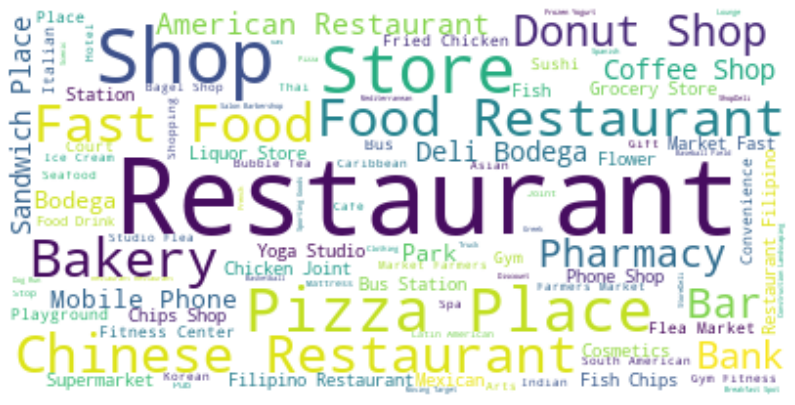

In [55]:
fig = ptl.figure()
fig.set_figwidth(14)
fig.set_figheight(14)

ptl.imshow(mnh_wd, interpolation='bilinear')
ptl.axis("off")
ptl.show()

# BAR CHART TO SHOW TOP 10 NEIGHBORHOODS OF QUEENS AND MANHATTAN WHICH HAS MORE VENUE CATEGORIES

In [66]:
queen_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
4,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym


In [67]:
mnh_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [104]:
queen_venues_new = queen_venues.groupby('Neighborhood').count().reset_index()
queen_venues_new.sort_values(by='Venue Category', axis=0, inplace=True)
queen_top_10 = queen_venues_new.tail(10).reset_index(drop=True)
queen_top_10.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'], axis=1, inplace=True)
queen_top_10.set_index('Neighborhood', inplace=True)
print(queen_top_10)

                   Venue Category
Neighborhood                     
Jamaica Center                 51
Rockaway Beach                 51
Flushing                       59
Hunters Point                  67
Long Island City               70
Bayside                        75
Woodside                       75
Jackson Heights                78
Astoria                        99
Sunnyside Gardens             100


In [126]:
mnh_venues_new = mnh_venues.groupby('Neighborhood').count().reset_index()
mnh_venues_new.sort_values(by='Venue Category', axis=0, inplace=True)
mnh_top_10 = mnh_venues_new.tail(10)

mnh_venues_new = mnh_venues.groupby('Neighborhood').count().reset_index()
mnh_venues_new.sort_values(by='Venue Category', axis=0, inplace=True)
mnh_top_10 = mnh_venues_new.tail(10).reset_index(drop=True)
mnh_top_10.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'], axis=1, inplace=True)
mnh_top_10.set_index('Neighborhood', inplace=True)
print(mnh_top_10)

                    Venue Category
Neighborhood                      
Civic Center                   100
Clinton                        100
East Village                   100
West Village                   100
Little Italy                   100
Lenox Hill                     100
Financial District             100
Flatiron                       100
Greenwich Village              100
Yorkville                      100


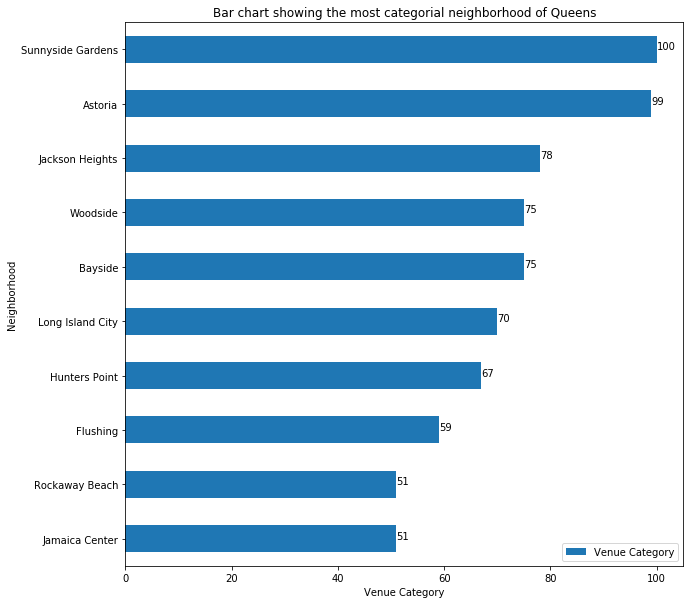

In [125]:
# create bar chart for Queen venues
queen_top_10.plot(kind='barh', figsize=(10,10))

ptl.xlabel('Venue Category')
ptl.ylabel('Neighborhood')
ptl.title("Bar chart showing the most categorial neighborhood of Queens")

for index, value in enumerate(queen_top_10['Venue Category']):
    label = format(int(value), ',') # format int with commas
    
    ptl.annotate(label, xy=(int(value) , index), color='black')

ptl.show()

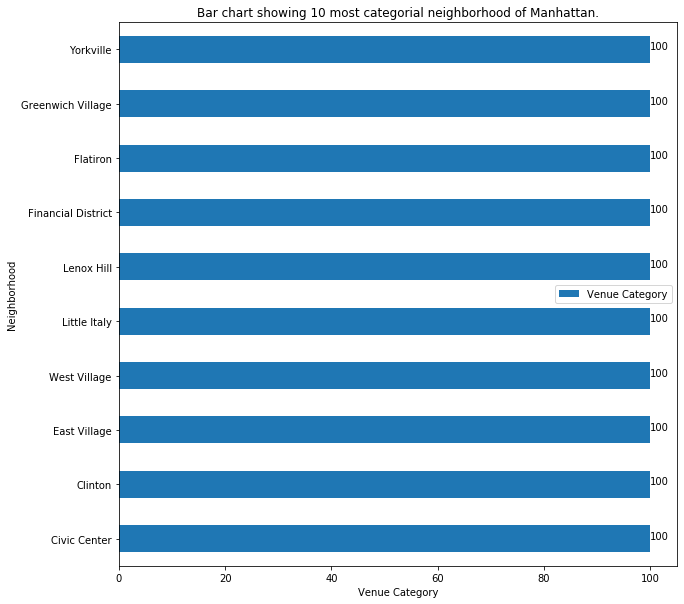

In [127]:
# create bar chart for top 10 most categorial venues neighbirhood in mnahattan

mnh_top_10.plot(kind='barh', figsize=(10,10))

ptl.xlabel("Venue Category")
ptl.ylabel("Neighborhood")
ptl.title("Bar chart showing 10 most categorial neighborhood of Manhattan.")

for index, value in enumerate(mnh_top_10['Venue Category']):
    label = format(int(value), ',') # format int with commas
    ptl.annotate(label, xy=(int(value) , index), color='black')

ptl.show()